# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

-------------

**Since I dont work with Google Colab I dont have to mount the drive**

## **Importing the necessary libraries**

In [1]:
# For data loading, manipulating, numbers crunching and plotting
import h5py # for loading h5 format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fixing the seed
import random

# For building our ANN and CNN model
from sklearn.model_selection import train_test_split # for splitting data in training and test data
from sklearn.preprocessing import MinMaxScaler # for scaling the data [0,1]
from tensorflow.keras import backend

import tensorflow as tf  # for building our model
from tensorflow.keras.models import Sequential  # to create a linear stack of layers for our neural network
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization  # for layers, regularization, activation functions, and normalization
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten
from tensorflow.keras.losses import categorical_crossentropy  # for our loss function; cross-entropy is often used with classification problems
from tensorflow.keras.optimizers import Adam  # algorithm for optimizing
from tensorflow.keras.utils import to_categorical  # to transform categorical variables into a one-hot encoding
from sklearn.metrics import classification_report, confusion_matrix # to evaluate our model

2024-05-31 13:28:45.870247: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Let us check the version of tensorflow.**

In [2]:
print(tf.__version__)

2.14.0


In [3]:
from IPython.core.display import display, HTML 

# Set the display option to avoid scrolling in output
display(HTML("<style>.output_wrapper, .output {height:auto !important; max-height:10000px;}</style>"))

/var/folders/jr/887rxn_n5nn1d9cjrnh9h7yh0000gn/T/ipykernel_4385/4173404798.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## **Load the dataset**

**Since a lot of people dont know what a h5 format is. I will give a little explanation to better understand what we are doing**: 

- The H5 format, also known as HDF5 (Hierarchical Data Format version 5), is a file format and set of tools for managing complex data. It is designed to store and organize large amounts of data. HDF5 is widely used in scientific computing, engineering, and other fields that require efficient handling of large datasets
------
- Let us now load the dataset (.h5 file.)
- After that we split the data into the train and the test dataset.

In [4]:
h5_file = 'SVHN_single_grey1.h5'  # save the file_path to a variable

with h5py.File(h5_file, 'r') as hdf: # hdf refers to file = h5py.File('SVHN_single_grey1.h5' )
    print("Keys in HDF5 file:", list(hdf.keys()))  # print keys

    # Split data into train and test data
    X_train = hdf['X_train'][:] # [:] --> slicing, take all elements of the dataset
    y_train = hdf['y_train'][:]
    X_test = hdf['X_test'][:]
    y_test = hdf['y_test'][:]

Keys in HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset and have a look ath the shape

In [5]:
# Print shapes of the loaded data
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


**Observation:**
- So we have 42.000 datapoints (images) for our training process and 18.000 for testing (data, labels)
- Each picture has a height and width of 32pixels x 32pixels --> 2D
------
How does this array look like

In [6]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

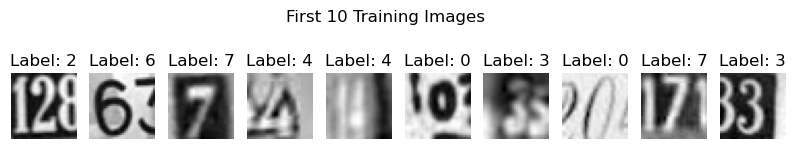

In [7]:
def plot_images(images, labels, num_images, title): # we need some arguments
    plt.figure(figsize=(10, 2)) # create a figure
    
    for i in range(num_images): # iterate over num_counts
        plt.subplot(1, num_images, i + 1) # 1 row, 10 columns, index (1-10) for image placement
        plt.imshow(images[i], cmap='gray') # we use imshow() for plotting the images
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_images(X_train, y_train, num_images=10, title="First 10 Training Images")

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

### **Print the shape and the array of the first image in our training dataset**

In [8]:
# Shape and array
print(f'Shape:\n {X_train[0].shape}')
print('---------------')
print(f'Array:\n {X_train[0]}')

Shape:
 (32, 32)
---------------
Array:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Reshaping the dataset**

For our ANN model we need to reshape our 2D image representation in a 1D image representation because simple ANN need a one dimensional form of input data

In [9]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [10]:
print(f'Shape:\n {X_train[0].shape}')
print('---------------')
print(f'now its a vector:\n {X_train[0]}')

Shape:
 (1024,)
---------------
now its a vector:
 [33.0704 30.2601 26.852  ... 49.6682 50.853  53.0377]


**Observations**
- So we changed a 32pixel by 32pixel image representation to a 1024 one-dimensional vector for our Models especially the ANN

### **Normalize the train and the test data**

In [11]:
# Normalizing the train and test dataset
X_train = X_train / 255
X_test = X_test / 255

X_train[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

We've normalized the dataset for our modeling within the interval [0,1]. This is crucial to prevent our model from favoring higher values in the array too much. You can now clearly see the differences between the original dataset and the normalized dataset.

### **One-hot encode output**

Within **one-hot-encoding** we bring our categorical label values (0-9)(target) to a binary format for a better learning process. A binary format means that each category is represented as a vector containing only ones and zeros. This is particularly useful for input into neural networks, which can efficiently process such vector. One-Hot-Encoding ensures that there is no implicit order or numerical relationship between the categories

In [12]:
# Rember our library: from tensorflow.keras.utils import to_categorical  
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shapes of the one-hot encoded target variables
print("Shape of y_train after one-hot encoding:", y_train.shape)


Shape of y_train after one-hot encoding: (42000, 10)


**Observation:**
- We now see 42.000 data points with 10 columns. Each column represents a number (0-9)
- **For example**: 
    - Numer 0 will be represented as: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## **ANN (Artificial Neuronal Network) Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### **Fix the seed for random number generators**

In [16]:
# Setting our random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [21]:
def nn_model_1(input_shape=(1024,), num_classes=10): #input_shape must be a tupel(1024,)
    
    model = Sequential() # create a instance of the tensorflow class sequential, initializing
    model.add(Dense(64, activation='relu', input_shape=input_shape)) # first hidden layer
    model.add(Dense(32, activation='relu')) # second hidden layer
    model.add(Dense(num_classes, activation='softmax')) # output layer, we use softmax for probability representation
    
    # Compile the model to define the loss function, the learning rate of Adam and our metric
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model

**Just some context for better understanding whats going on**

- **Loss Function**:
    - The loss function measures how well the model predicts the training data. A commonly used loss for classification problems is categorical cross-entropy. This function compares the predicted probability distributions with the actual class labels and returns a number indicating the magnitude of the error.

- **Gradient Descent**:
    - Gradient Descent is an optimization algorithm used to update the weights of the neural network to minimize the loss. It calculates the gradients (derivatives) of the loss function with respect to the model parameters and adjusts these parameters to minimize the loss function.

- **Backpropagation**:
    - Backpropagation is the algorithm that calculates the gradients. It uses the chain rule of differentiation to compute the gradients of the loss function with respect to each parameter in the network. These gradients are then propagated backward from the output layer to the input layer.

- **Function of the Adam Algorithm**:

    - Adam (Adaptive Moment Estimation) is an advanced optimization algorithm based on Gradient Descent but uses additional techniques to accelerate convergence and stabilize adjustment

In [22]:
# Call the nn_model_1 and store it in a variable
model_1 = nn_model_1()

In [23]:
# Print the summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Fit the model
history_model_1 = model_1.fit(
    X_train, y_train, validation_split=0.2, batch_size=128, epochs=20, verbose=1
)

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.3001 - accuracy: 0.1028 - val_loss: 2.2833 - val_accuracy: 0.1186
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.1704 - accuracy: 0.1865 - val_loss: 1.9455 - val_accuracy: 0.3038
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6959 - accuracy: 0.4225 - val_loss: 1.4936 - val_accuracy: 0.5096
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4426 - accuracy: 0.5219 - val_loss: 1.4359 - val_accuracy: 0.5240
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3451 - accuracy: 0.5652 - val_loss: 1.3182 - val_accuracy: 0.5729
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.2716 - accuracy: 0.5954 - val_loss: 1.2630 - val_accuracy: 0.6060
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.2252 - accuracy: 0.6159 - val_loss: 1.2189 - val_accuracy: 0.6251
Epoch 

**Some explanations**
- **Validation Split**: The proportion of the training data used for model validation. In our case, 20% of the training data is reserved for validation purposes.

- **Batch Size**: The number of data points provided to the model at once to calculate the optimal weights. The entire dataset is split into smaller batches for training purposes. In our example, the batch size is 128 images. Therefore, to complete one full pass through the dataset (one epoch), we need 33,600/128=262.533,600/128=262.5 batches.

- **Epochs**: The number of complete passes through the entire training dataset

### **Plot the Training and Validation Accuracies and write down your Observations.**

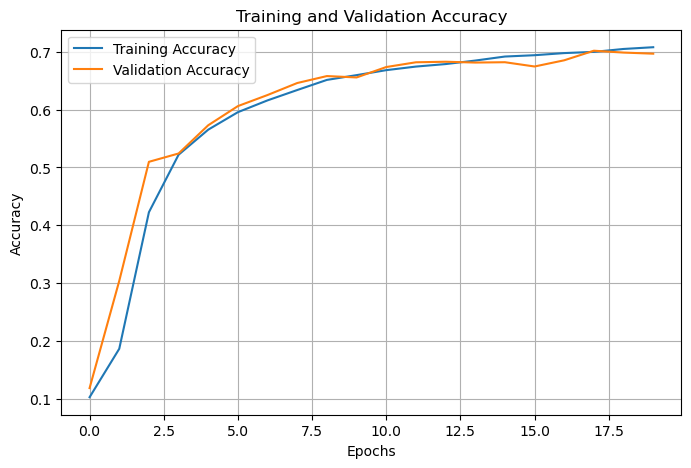

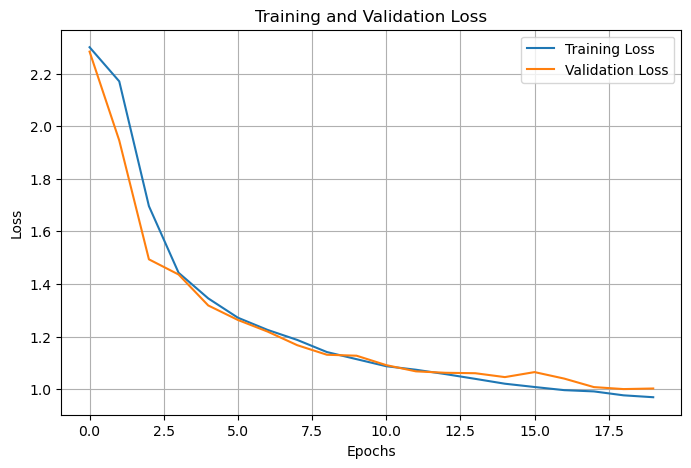

In [27]:
# Plot the training and validation accuracies
plt.figure(figsize=(8, 5))
plt.plot(history_model_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history_model_1.history['loss'], label='Training Loss')
plt.plot(history_model_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

**Training and Validation Accuracy**:
- Both training and validation accuracy increase steadily over the epochs, showing a similar trend.
- Initially, there is a rapid increase in accuracy for both training and validation sets.
- After approximately 10 epochs, the accuracy begins to plateau, indicating that the model is starting to converge.
- The training and validation accuracy are very close to each other throughout the training process, suggesting that the model is not overfitting and generalizes well to unseen data.

**Training and Validation Loss**:.
- Both training and validation loss decrease steadily over the epochs, following a similar trend.
- There is a sharp decline in loss for both training and validation sets in the first few epochs.
- After about 10 epochs, the rate of decrease in loss slows down, indicating that the model is approaching its optimal state.
- The training and validation loss remain close to each other, which further supports that the model is not overfitting and is learning effectively.

**Summary**

- The model shows good learning behavior with both training and validation accuracy increasing and loss decreasing over the epochs.
- The close alignment between training and validation metrics indicates that the model generalizes well and is not overfitting.
- The model reaches a point of convergence around 10 epochs, after which improvements in accuracy and reductions in loss are marginal

--------
Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [31]:
# Clearing the backend
backend.clear_session()

In [32]:
# Fixing seed again
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [33]:
def nn_model_2(input_shape=(1024,), num_classes=10):
    model = Sequential() # initializing
    
    model.add(Dense(256, activation='relu', input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2)) # dropout layer
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization()) # batch normalization layer
    model.add(Dense(num_classes, activation='softmax')) # output layer
              
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )
    return model

model_2 = nn_model_2()

history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
263/263 [==============================] - 3s 7ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 1s 6ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3015 - val_accuracy: 0.1100
Epoch 3/30
263/263 [==============================] - 1s 6ms/step - loss: 2.1541 - accuracy: 0.1857 - val_loss: 2.0415 - val_accuracy: 0.2806
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 1.5745 - accuracy: 0.4633 - val_loss: 1.4494 - val_accuracy: 0.5340
Epoch 5/30
263/263 [==============================] - 1s 6ms/step - loss: 1.3017 - accuracy: 0.5720 - val_loss: 1.2841 - val_accuracy: 0.5795
Epoch 6/30
263/263 [==============================] - 1s 6ms/step - loss: 1.1911 - accuracy: 0.6137 - val_loss: 1.1061 - val_accuracy: 0.6467
Epoch 7/30
263/263 [==============================] - 2s 6ms/step - loss: 1.1059 - accuracy: 0.6482 - val_loss: 1.0379 - val_accuracy: 0.6715
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

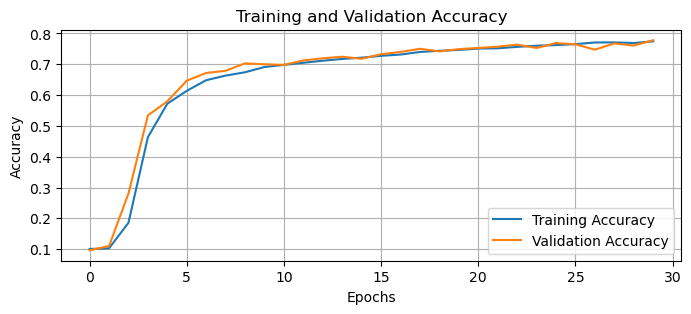

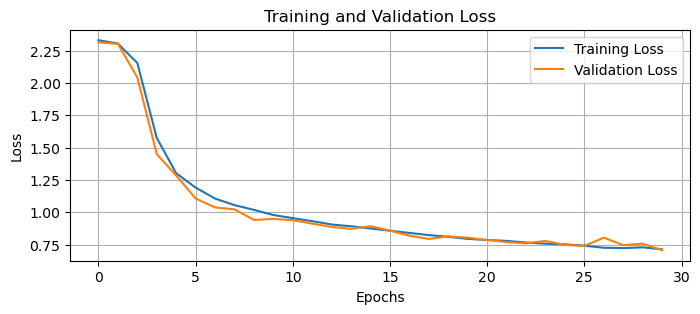

In [34]:
plt.figure(figsize=(8, 3))
plt.plot(history_model_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot the training and validation losses
plt.figure(figsize=(8, 3))
plt.plot(history_model_2.history['loss'], label='Training Loss')
plt.plot(history_model_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

**Training and Validation Accuracy:**
- Both training and validation accuracy increase rapidly in the first few epochs and then start to plateau around epoch 5.
- The accuracy continues to improve gradually up to around epoch 15 and then fluctuates slightly but generally stays stable.
- The training and validation accuracy are closely aligned, indicating good generalization and minimal overfitting.

**Training and Validation Loss:**
- Both training and validation loss decrease rapidly in the first few epochs, similar to the accuracy trend.
- The loss continues to decrease and stabilizes around epoch 15, with slight fluctuations afterward.
- The close alignment between training and validation loss further supports that the model is not overfitting and is learning effectively.

**Comparison with the First Model**

**Accuracy:**
- The second model achieves higher accuracy compared to the first model, indicating that the additional layers and modifications (like Dropout and BatchNormalization) have improved the model's learning capacity.
- Both models show a rapid increase in accuracy in the initial epochs, but the second model continues to improve and stabilizes at a higher accuracy.

**Loss:**
- The second model also shows a more consistent decrease in loss compared to the first model. The training and validation losses are lower in the second model, indicating better performance.
- The loss in the first model started to plateau around epoch 10, whereas the second model shows continuous improvement up to around epoch 15 before stabilizing.

**Summary**

- The second model, with its more complex architecture (including additional hidden layers, Dropout, and BatchNormalization), outperforms the first model in terms of both accuracy and loss.
- The second model demonstrates better generalization and learning capacity, as evidenced by the close alignment of training and validation metrics and the higher overall accuracy.
- The use of Dropout likely helped to reduce overfitting, while BatchNormalization may have contributed to faster convergence and improved performance.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [35]:
y_pred = model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels
y_true = np.argmax(y_test, axis=1) 

563/563 [==============================] - 1s 2ms/step


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

Classification Report:
               precision    recall  f1-score   support

           0     0.8735    0.7806    0.8245      1814
           1     0.7640    0.8217    0.7918      1828
           2     0.8307    0.7781    0.8036      1803
           3     0.7593    0.7248    0.7417      1719
           4     0.7635    0.8515    0.8051      1812
           5     0.7138    0.7873    0.7488      1768
           6     0.7620    0.7882    0.7749      1832
           7     0.8233    0.8197    0.8215      1808
           8     0.7541    0.7158    0.7344      1812
           9     0.7973    0.7500    0.7729      1804

    accuracy                         0.7821     18000
   macro avg     0.7842    0.7818    0.7819     18000
weighted avg     0.7844    0.7821    0.7822     18000



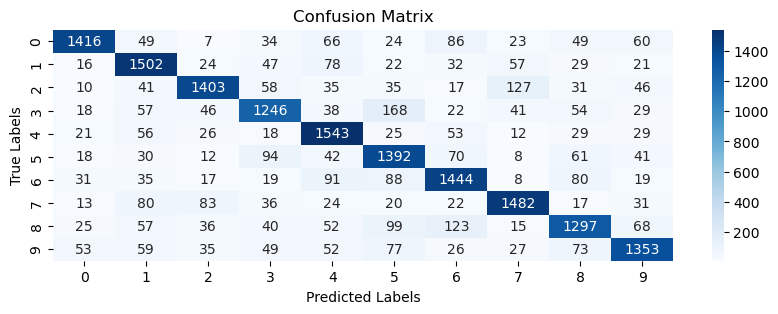

In [40]:
report = classification_report(y_true, y_pred_classes, digits=4)
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Final Observations:**
- Overall, we find an f1-score as a weighted sum of precision and recall of 0.7821, which indicates a reasonably good performance for a simple ANN model.
    - Let's walk through some numbers:
       - The actual number 9 is often predicted as 0, 1, or 5.
       - The actual number 8 is often predicted as 5 or 6.
       - The actual number 3 is often predicted as 5, 1, or 8.
- Considering different styles of writing the numbers, these misclassifications seem logical.
- Examining precision and recall, we see classes that are highly accurate in predicting the correct labels.
- The alignment between training and validation accuracy suggests good generalization, with minimal overfitting.
- Further model tuning, possibly incorporating additional data augmentation, fine-tuning learning rates, or using more complex architectures, could help improve performance, particularly for the classes with lower metrics.
- Additional analysis to understand the features causing misclassifications can provide insights for model improvement.

-------------

**Conclusion**

The model demonstrates solid performance with an overall accuracy of 78.21%. While it excels in identifying certain classes, there is room for improvement in others. The classification report and confusion matrix provide a comprehensive view of the model's performance, highlighting both its strengths and areas for improvement. Future work should focus on addressing the identified weaknesses to enhance the model's overall effectiveness

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [13]:
h5_file = 'SVHN_single_grey1.h5'  # save the file_path to a variable

with h5py.File(h5_file, 'r') as hdf: # hdf refers to file = h5py.File('SVHN_single_grey1.h5' )
    print("Keys in HDF5 file:", list(hdf.keys()))  # print keys

    # Split data into train and test data
    X_train = hdf['X_train'][:] # [:] --> slcicing, take all elements of the dataset
    y_train = hdf['y_train'][:]
    X_test = hdf['X_test'][:]
    y_test = hdf['y_test'][:]

Keys in HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [14]:
# Print shapes of the loaded data
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


**Observation:**
- We see the same information as in the beginngin for building our ANN


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [15]:
# Shape and array
print(f'Shape:\n {X_train[0].shape}')
print('---------------')
print(f'Array:\n {X_train[0]}')

Shape:
 (32, 32)
---------------
Array:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [16]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [17]:
print(f'Shape:\n {X_train[0].shape}')
print('---------------')
print(f'array:\n {X_train[0]}')

Shape:
 (32, 32, 1)
---------------
array:
 [[[ 33.0704]
  [ 30.2601]
  [ 26.852 ]
  ...
  [ 71.4471]
  [ 58.2204]
  [ 42.9939]]

 [[ 25.2283]
  [ 25.5533]
  [ 29.9765]
  ...
  [113.0209]
  [103.3639]
  [ 84.2949]]

 [[ 26.2775]
  [ 22.6137]
  [ 40.4763]
  ...
  [113.3028]
  [121.775 ]
  [115.4228]]

 ...

 [[ 28.5502]
  [ 36.212 ]
  [ 45.0801]
  ...
  [ 24.1359]
  [ 25.0927]
  [ 26.0603]]

 [[ 38.4352]
  [ 26.4733]
  [ 23.2717]
  ...
  [ 28.1094]
  [ 29.4683]
  [ 30.0661]]

 [[ 50.2984]
  [ 26.0773]
  [ 24.0389]
  ...
  [ 49.6682]
  [ 50.853 ]
  [ 53.0377]]]


Normalize inputs from 0-255 to 0-1

In [18]:
X_train = X_train / 255
X_test = X_test / 255

Print New shape of Training and Test

In [19]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [20]:
# Rember our library: from tensorflow.keras.utils import to_categorical  
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shapes of the one-hot encoded target variables
print("Shape of y_train after one-hot encoding:", y_train.shape)


Shape of y_train after one-hot encoding: (42000, 10)


**Observation:**
- We now see 42.000 data points with 10 columns. Each column represents a number (0-9)
- **For example**: 
    - Numer 0 will be represented as: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [21]:
# Setting our random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [22]:
# Let's give it a try
def cnn_model_1(input_shape=(32, 32, 1), num_classes=10):
    model = Sequential()
    
    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))
    
    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    
    # MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten the output
    model.add(Flatten())
    print(f'After Flatten layer: {model.output_shape}')
    
    # Dense layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    
    return model

cnn_model_1 = cnn_model_1()
cnn_model_1.summary()

After Flatten layer: (None, 8192)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                      

**Some explanations and information for the CNN architecture to see what's going on**

CNNs exists of multiple specific layers to extract features out of image data and to classify images in special categories, detecting objects or for image segmentation. CNNs are special in finding local data structures like edges, corners or more compley forms.

**Step-by-Step Explanation:**

**1. Input Data**

**Input:** 32x32x1 (grayscale image)

**2. First Convolutional Layer**
- **Filter:** 3x3, 16 filters, padding='same'
- **Activation:** LeakyReLU(alpha=0.1)
- **Output:** 32x32x16

**What happens:**
A 3x3 filter is applied to the input image. With `padding='same'`, the output size remains 32x32 as the image is padded with zeros at the borders. 16 different filters are applied, resulting in 16 feature maps. LeakyReLU is used to introduce non-linearity.

**3. Second Convolutional Layer**
- **Filter:** 3x3, 32 filters, padding='same'
- **Activation:** LeakyReLU(alpha=0.1)
- **Output:** 32x32x32

**What happens:**
Another 3x3 filter is applied to the 16 feature maps from the first layer. With `padding='same'`, the output size remains 32x32. 32 different filters result in 32 feature maps. LeakyReLU is used again.

**4. MaxPooling Layer**
- **Pool Size:** 2x2
- **Output:** 16x16x32

**What happens:**
Max-pooling reduces the dimensions of the feature maps by taking the maximum value from each 2x2 block, halving the height and width.

**5. Flatten the Output**
- **Output:** 8192 (16x16x32)

**What happens:**
The 2D feature maps are converted into a 1D vector to prepare for the dense layers.

**6. Dense Layer with 32 Nodes**
- **Nodes:** 32
- **Activation:** LeakyReLU(alpha=0.1)
- **Output:** 32

**What happens:**
A fully connected layer with 32 neurons, each receiving inputs from all 8192 neurons of the previous layer. LeakyReLU is applied.

**7. Output Layer**
- **Nodes:** Number of classes (10)
- **Activation:** Softmax
- **Output:** 10

**What happens:**
The final layer produces classification results. Softmax is applied to compute probabilities for each class.

**Conv2D Explanation:**
`Conv2D` stands for 2-dimensional convolution. It applies a set of filters to the input data, extracting features such as edges, textures, and patterns. The parameters include the number of filters, filter size, padding type, and input shape.

**Padding Explanation:**
Padding adds extra pixels around the input image to control the output size after convolution. There are different types of padding:

**Valid Padding:** No padding, only valid input pixels are considered.
- **Example:**
    ```
    Input:
    | 1 | 2 | 3 |
    | 4 | 5 | 6 |
    | 7 | 8 | 9 |
    ```
    ```
    Filter (2x2):
    | a | b |
    | c | d |
    ```
    ```
    Output:
    |(a*1+b*2+c*4+d*5)|(a*2+b*3+c*5+d*6)|
    |(a*4+b*5+c*7+d*8)|(a*5+b*6+c*8+d*9)|
    ```

**Same Padding:** Pads the input so the output size matches the input size.
- **Example:**
    ```
    Input:
    | 1 | 2 | 3 |
    | 4 | 5 | 6 |
    | 7 | 8 | 9 |
    ```
    ```
    Padding:
    | 0 | 0 | 0 | 0 | 0 |
    | 0 | 1 | 2 | 3 | 0 |
    | 0 | 4 | 5 | 6 | 0 |
    | 0 | 7 | 8 | 9 | 0 |
    | 0 | 0 | 0 | 0 | 0 |
    ```
    ```
    Filter (3x3):
    | a | b | c |
    | d | e | f |
    | g | h | i |
    ```
    ```
    Output:
    |(a*0+b*0+c*0+d*0+e*1+f*2+g*0+h*4+i*5) ... |
    |... |
    ```

**LeakyReLU Explanation:**
`LeakyReLU` is a type of activation function that allows a small, non-zero gradient when the unit is not active. The parameter `alpha` determines the slope of the function for negative inputs.
- **Example:**
    - For positive inputs: `LeakyReLU(x) = x`
    - For negative inputs: `LeakyReLU(x) = alpha * x`
    - With `alpha = 0.1`, a negative input `-5` would be transformed to `-0.5`.

**Flattening Explanation:**
Flattening converts multi-dimensional data into a single-dimensional vector.
- **Example:**
    - **Input (2x2x3):**
    ```
    [[1, 2, 3], [4, 5, 6]],
     [[7, 8, 9], [10, 11, 12]]
    ```
    - **Output:**
    ```
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    ```



In [70]:
history_cnn_model_1 = cnn_model_1.fit(
    X_train, y_train, validation_split=0.2, batch_size=32, epochs=20, verbose=1
)

Epoch 1/20
1050/1050 [==============================] - 38s 35ms/step - loss: 1.1250 - accuracy: 0.6311 - val_loss: 0.6383 - val_accuracy: 0.8165
Epoch 2/20
1050/1050 [==============================] - 34s 33ms/step - loss: 0.5417 - accuracy: 0.8450 - val_loss: 0.5193 - val_accuracy: 0.8536
Epoch 3/20
1050/1050 [==============================] - 35s 33ms/step - loss: 0.4474 - accuracy: 0.8683 - val_loss: 0.5248 - val_accuracy: 0.8543
Epoch 4/20
1050/1050 [==============================] - 35s 33ms/step - loss: 0.3827 - accuracy: 0.8883 - val_loss: 0.4515 - val_accuracy: 0.8769
Epoch 5/20
1050/1050 [==============================] - 33s 32ms/step - loss: 0.3375 - accuracy: 0.8977 - val_loss: 0.4656 - val_accuracy: 0.8692
Epoch 6/20
1050/1050 [==============================] - 35s 33ms/step - loss: 0.2982 - accuracy: 0.9097 - val_loss: 0.4795 - val_accuracy: 0.8665
Epoch 7/20
1050/1050 [==============================] - 34s 33ms/step - loss: 0.2671 - accuracy: 0.9191 - val_loss: 0.4547 -

### **Plot the Training and Validation Accuracies and Write your observations.**

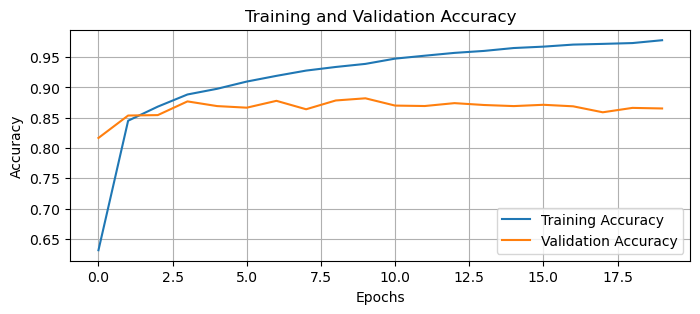

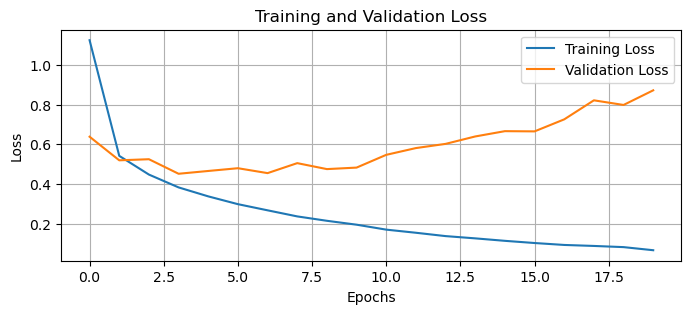

In [71]:
plt.figure(figsize=(8, 3))
plt.plot(history_cnn_model_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn_model_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot the training and validation losses
plt.figure(figsize=(8, 3))
plt.plot(history_cnn_model_1.history['loss'], label='Training Loss')
plt.plot(history_cnn_model_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

**Training and Validation Accuracy**

**Training Accuracy:**
- The training accuracy increases steadily throughout the epochs, indicating that the model is learning from the training data. By the end of the training, the training accuracy is very high, close to 95%.

**Validation Accuracy:**
- The validation accuracy increases rapidly in the initial epochs and then plateaus around epoch 5. The validation accuracy fluctuates slightly around 85% after epoch 5, indicating that the model's performance on the validation set has stabilized but is not improving further.

**Training and Validation Loss**

**Training Loss:**
- The training loss decreases steadily throughout the epochs, which is consistent with the increasing training accuracy. The loss curve suggests that the model is fitting the training data well, as the loss continues to decrease.

**Validation Loss:**
- The validation loss decreases initially but then starts to increase slightly after a few epochs, around epoch 5. This increase in validation loss, while the validation accuracy remains stable, suggests that the model might be starting to overfit the training data.

**Interpretation**

Overfitting: The divergence between training and validation performance is a classic sign of overfitting. The model performs very well on the training data (high training accuracy, low training loss) but does not improve on the validation data (stable validation accuracy, increasing validation loss). Overfitting occurs when the model learns the noise and details in the training data to such an extent that it negatively impacts the performance on new data.

**Model Complexity:**
- The current model may have more capacity than necessary for the given task, leading it to overfit the training data. This is indicated by the high training accuracy but lower validation accuracy and increasing validation loss.

**Potential Solutions:**
- Regularization: Introducing regularization techniques such as Dropout, L2 regularization, or early stopping can help reduce overfitting.
- Data Augmentation: Applying data augmentation can help the model generalize better by providing more varied training examples.
- Simplifying the Model: Reducing the number of layers or the number of neurons in each layer can help prevent the model from overfitting

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [72]:
# Setting our random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [74]:

def cnn_model_2(input_shape=(32, 32, 1), num_classes=10):
    model = Sequential()
    
    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))
    
    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    
    # Max-Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Batch Normalization layer
    model.add(BatchNormalization())
    
    # Third Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    
    # Fourth Convolutional layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    
    # Max-Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Batch Normalization layer
    model.add(BatchNormalization())
    
    # Flatten the output
    model.add(Flatten())
    
    # Dense layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    
    # Dropout layer
    model.add(Dropout(0.5))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    
    return model


cnn_model_2 = cnn_model_2()

cnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                     

In [75]:
history_cnn_2 = cnn_model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)


Epoch 1/30
263/263 [==============================] - 51s 187ms/step - loss: 1.3904 - accuracy: 0.5285 - val_loss: 1.6449 - val_accuracy: 0.4905
Epoch 2/30
263/263 [==============================] - 50s 190ms/step - loss: 0.6741 - accuracy: 0.7935 - val_loss: 0.5849 - val_accuracy: 0.8318
Epoch 3/30
263/263 [==============================] - 52s 196ms/step - loss: 0.5488 - accuracy: 0.8335 - val_loss: 0.4575 - val_accuracy: 0.8674
Epoch 4/30
263/263 [==============================] - 51s 194ms/step - loss: 0.4968 - accuracy: 0.8499 - val_loss: 0.4591 - val_accuracy: 0.8664
Epoch 5/30
263/263 [==============================] - 50s 190ms/step - loss: 0.4433 - accuracy: 0.8640 - val_loss: 0.4014 - val_accuracy: 0.8887
Epoch 6/30
263/263 [==============================] - 50s 189ms/step - loss: 0.4171 - accuracy: 0.8737 - val_loss: 0.4091 - val_accuracy: 0.8810
Epoch 7/30
263/263 [==============================] - 52s 196ms/step - loss: 0.3789 - accuracy: 0.8846 - val_loss: 0.4044 - val_ac

### **Plot the Training and Validation accuracies and write your observations.**

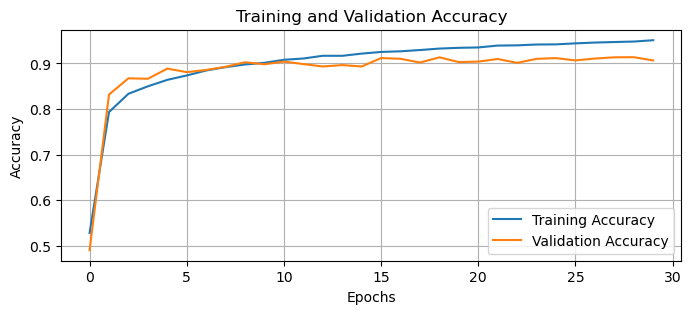

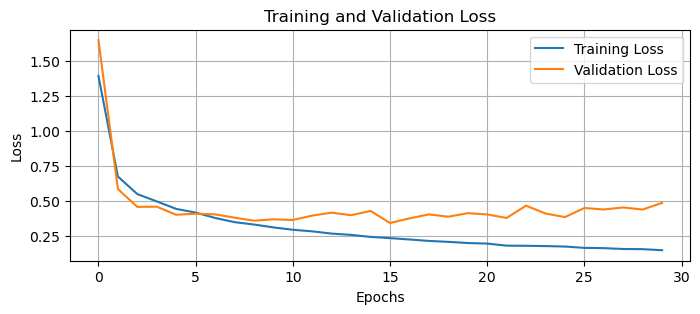

In [76]:
plt.figure(figsize=(8, 3))
plt.plot(history_cnn_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot the training and validation losses
plt.figure(figsize=(8, 3))
plt.plot(history_cnn_2.history['loss'], label='Training Loss')
plt.plot(history_cnn_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

- **Training and Validation Accuracy**:
  - The training accuracy increases rapidly in the initial epochs and then continues to improve gradually, reaching over 90%.
  - The validation accuracy also increases quickly and stabilizes around 85-90% after the initial epochs.
  - The close alignment between training and validation accuracy suggests good generalization with minimal overfitting.

- **Training and Validation Loss**:
  - The training loss decreases steadily throughout the epochs, indicating that the model is effectively learning from the training data.
  - The validation loss decreases initially and then stabilizes with slight fluctuations, which is typical when the model starts to converge.
  - The validation loss remains consistently close to the training loss, further indicating that the model generalizes well to unseen data.

**Interpretation**

1. **Generalization**:
   - The model demonstrates good generalization as evidenced by the close alignment of training and validation accuracy and loss. This means that the model is not overfitting and is performing well on both training and validation sets.

2. **Performance**:
   - Achieving over 90% training accuracy and around 85-90% validation accuracy indicates that the model has a strong ability to classify the input data correctly.
   - The use of additional layers such as BatchNormalization and Dropout likely contributed to improved stability and generalization performance.

3. **Convergence**:
   - The model converges well within the 30 epochs, as shown by the stabilization of both accuracy and loss metrics. This suggests that the chosen architecture and training parameters are effective for this task.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [77]:
# Make predictions on the test data
y_pred = cnn_model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

563/563 [==============================] - 11s 19ms/step


### **Performance of the model on the test data.**

Classification Report:
               precision    recall  f1-score   support

           0     0.9120    0.9366    0.9241      1814
           1     0.8928    0.9158    0.9041      1828
           2     0.9256    0.9107    0.9181      1803
           3     0.8737    0.8895    0.8815      1719
           4     0.9229    0.9255    0.9242      1812
           5     0.9162    0.8971    0.9065      1768
           6     0.8889    0.9045    0.8966      1832
           7     0.9397    0.9137    0.9265      1808
           8     0.8905    0.8891    0.8898      1812
           9     0.9181    0.8952    0.9065      1804

    accuracy                         0.9079     18000
   macro avg     0.9081    0.9078    0.9078     18000
weighted avg     0.9082    0.9079    0.9079     18000



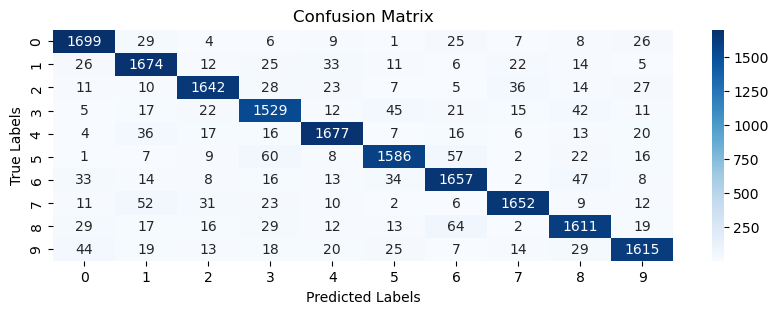

In [80]:
report = classification_report(y_true, y_pred_classes, digits=4)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



**Final Report and Observations on Model Performance**

**Classification Report**
The classification report provides detailed metrics such as precision, recall, f1-score, and support for each class. Here are the key insights:

- **Overall Accuracy**:
  - The model achieves an overall accuracy of **90.79%** on the test set.

- **Class-wise Performance**:
  - **Class 0**: Precision is 0.9120, recall is 0.9366, and f1-score is 0.9241.
  - **Class 1**: Precision is 0.8928, recall is 0.9158, and f1-score is 0.9041.
  - **Class 4**: The highest recall of 0.9255, indicating the model is very good at identifying this class.
  - **Class 8**: The lowest precision of 0.8905, suggesting the model struggles slightly more to accurately identify this class.

- **Macro and Weighted Averages**:
  - **Macro Average**: Precision is 0.9081, recall is 0.9078, and f1-score is 0.9078.
  - **Weighted Average**: Precision is 0.9082, recall is 0.9079, and f1-score is 0.9079. These averages indicate a balanced performance across all classes.

**Confusion Matrix**
The confusion matrix visualizes the true labels versus the predicted labels. Key observations include:

- **Diagonal Dominance**:
  - Most values are concentrated along the diagonal, indicating correct predictions.

- **Class Misclassifications**:
  - **Class 8**: Shows some misclassifications into classes 5 and 3.
  - **Class 9**: Some misclassifications spread across multiple classes, indicating difficulty in predicting this class accurately.

- **Misclassification Patterns**:
  - The matrix shows specific patterns where certain classes are confused with others, which can be due to similar features in those classes.

**Observations**

1. **Model Strengths**:
  - The model shows strong performance with an overall accuracy of 90.79%.
  - It performs particularly well in identifying classes with high precision and recall such as class 0 and class 4.

2. **Areas for Improvement**:
  - The model has slightly lower precision for certain classes like class 8, indicating potential areas for improvement.
  - Misclassifications across certain classes suggest the need for further refinement in distinguishing between those classes.

3. **Generalization**:
  - The alignment between training and validation accuracy suggests good generalization, with minimal overfitting.

4. **Future Work**:
  - Further model tuning, possibly incorporating additional data augmentation, fine-tuning learning rates, or using more complex architectures, could help improve performance, particularly for the classes with lower metrics.
  - Additional analysis to understand the features causing misclassifications can provide insights for model improvement.

**Conclusion**
The model demonstrates excellent performance with an overall accuracy of 90.79%. While it excels in identifying certain classes, there is still room for improvement in others. The classification report and confusion matrix provide a comprehensive view of the model's performance, highlighting both its strengths and areas for improvement. Future work should focus on addressing the identified weaknesses to enhance the model's overall effectiveness.
